# Multiple Linear Regression (MLR)

As a statistical tool, Multiple linear regression models and analysing the relationship between the dependent variable and two or more independent variables with the aim to find the best-fitting linear equation that describes how the dependent variable changes in response to changes in the independent variables.

As a machine learning algorithm, multiple linear regression is the simplest supervised learning models used in predicting a continuous outcome based on input features.

In this context, we explore multiple linear regression as a statistical method and as a machine learning algorithm.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

## Importing the dataset and Data preprocessing

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
    Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB

The dataset is about the expenditure and profit made by 50 startups. It contains the spending of three departments, R&D, Administrative and marketing; the location of the startups and profit made. 

The  independent varaibles are: R&D spend, Administration, Marketing spend and State (categorical variable) 

In [3]:
# Data selection
X = dataset.iloc[:, :-1].values ## The independent variables 
y = dataset.iloc[:, -1].values ### The dependent variables (input feature)

# Exploratory Data Analysis

In [4]:
# Group by 'State' and count the number of startups
summary_table = dataset.groupby('State').size().reset_index(name='Count of State')

# Add a grand total row
grand_total = pd.DataFrame({'State': ['Grand Total'], 'Count of State': [summary_table['Count of State'].sum()]})
summary_table = pd.concat([summary_table, grand_total], ignore_index=True)

print(summary_table)

         State  Count of State
0   California              17
1      Florida              16
2     New York              17
3  Grand Total              50


In [5]:
# Group by 'State' and calculate the mean for each numeric column
summary_table = dataset.groupby('State').agg({
    'R&D Spend': 'mean',
    'Marketing Spend': 'mean',
    'Administration': 'mean',
    'Profit': 'mean'
}).reset_index()

# Rename columns for better readability
summary_table.columns = ['Row Labels', 'Average of R&D Spend', 'Average of Marketing Spend', 'Average of Administration', 'Average of Profit']

# Add a grand total row
grand_total = pd.DataFrame({
    'Row Labels': ['Grand Total'],
    'Average of R&D Spend': [summary_table[['Average of R&D Spend']].mean().values[0]],
    'Average of Marketing Spend': [summary_table[['Average of Marketing Spend']].mean().values[0]],
    'Average of Administration': [summary_table[['Average of Administration']].mean().values[0]],
    'Average of Profit': [summary_table[['Average of Profit']].mean().values[0]]
})
summary_table = pd.concat([summary_table, grand_total], ignore_index=True)

# Format all columns to 2 decimal places
summary_table = summary_table.round(2)

print(summary_table)
# Save the summary table to an Excel file
#summary_table.to_excel('startup_summary.xlsx', index=False, sheet_name='Summary')


    Row Labels  Average of R&D Spend  Average of Marketing Spend  \
0   California              64657.67                   182540.93   
1      Florida              80724.02                   247323.55   
2     New York              76195.06                   205346.02   
3  Grand Total              73858.92                   211736.83   

   Average of Administration  Average of Profit  
0                  120746.51          103905.18  
1                  121768.90          118774.02  
2                  121543.47          113756.45  
3                  121352.96          112145.22  


In [6]:

# Group by 'State' and calculate the mean for each numeric column
summary_table = dataset.groupby('State').agg({
    'R&D Spend': 'sum',
    'Marketing Spend': 'sum',
    'Administration': 'sum',
    'Profit': 'sum'
}).reset_index()

# Rename columns for better readability
summary_table.columns = ['Row Labels', 'Sum of R&D Spend', 'Sum of Marketing Spend', 'Sum of Administration',
                         'Sum of Profit']

# Add a grand total row
grand_total = pd.DataFrame({
    'Row Labels': ['Grand Total'],
    'Sum of R&D Spend': [summary_table[['Sum of R&D Spend']].sum().values[0]],
    'Sum of Marketing Spend': [summary_table[['Sum of Marketing Spend']].sum().values[0]],
    'Sum of Administration': [summary_table[['Sum of Administration']].sum().values[0]],
    'Sum of Profit': [summary_table[['Sum of Profit']].sum().values[0]]
})
summary_table = pd.concat([summary_table, grand_total], ignore_index=True)

# Format all columns to 2 decimal places
summary_table = summary_table.round(2)
print(summary_table)

# Save the summary table to an Excel file
#summary_table.to_excel('startup_summary.xlsx', index=False, sheet_name='Summary')


    Row Labels  Sum of R&D Spend  Sum of Marketing Spend  \
0   California        1099180.46              3103195.80   
1      Florida        1291584.26              3957176.82   
2     New York        1295316.06              3490882.27   
3  Grand Total        3686080.78             10551254.89   

   Sum of Administration  Sum of Profit  
0             2052690.62     1766387.98  
1             1948302.36     1900384.39  
2             2066239.00     1933859.59  
3             6067231.98     5600631.96  


Among the three states, Florida has the lowest number of startup of 16, while California and New York has the highest with 17 startups. Eventhough California and New York have the same number of startup, New york start ups spends more and make the highest profit among the three while on the other hand, start-ups in California spend the least and made the least profit.

Moreso, on average

# Visualization

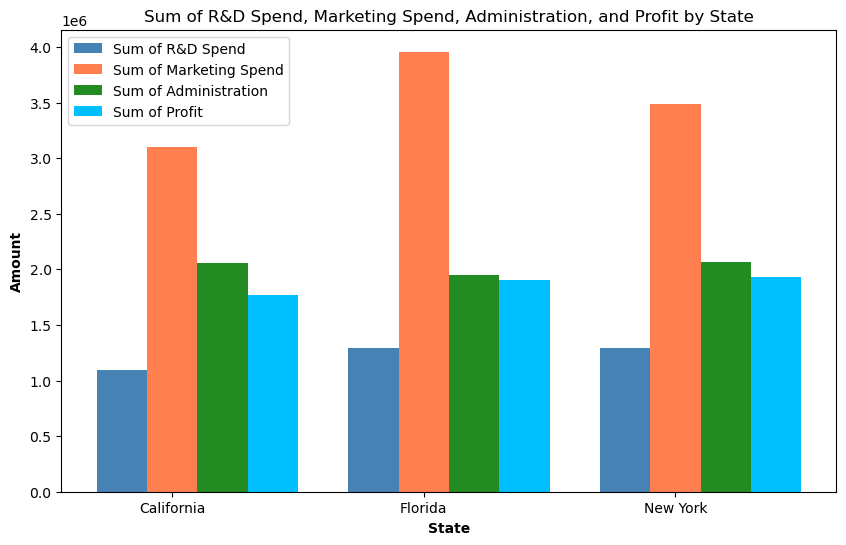

In [7]:
# Visualizing the information on the summary table 

# Filter out the grand total row for the plot
filtered_table = summary_table[summary_table['Row Labels'] != 'Grand Total']

# Extracting the data from the summary_table
states = filtered_table['Row Labels'].tolist()
r_d_spend = filtered_table['Sum of R&D Spend'].tolist()
marketing_spend = filtered_table['Sum of Marketing Spend'].tolist()
administration_spend = filtered_table['Sum of Administration'].tolist()
profit = filtered_table['Sum of Profit'].tolist()

# Position of bars on x-axis for each of the state
bar_width = 0.2
r1 = np.arange(len(states))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar chart
plt.figure(figsize=(10,6))

plt.bar(r1, r_d_spend, color='steelblue', width=bar_width, label='Sum of R&D Spend')
plt.bar(r2, marketing_spend, color='coral', width=bar_width, label='Sum of Marketing Spend')
plt.bar(r3, administration_spend, color='forestgreen', width=bar_width, label='Sum of Administration')
plt.bar(r4, profit, color='deepskyblue', width=bar_width, label='Sum of Profit')

# Adding labels and title
plt.xlabel('State', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(states))], states)

# Adding a legend
plt.legend()

# Display the chart
plt.title('Sum of R&D Spend, Marketing Spend, Administration, and Profit by State')
plt.show()


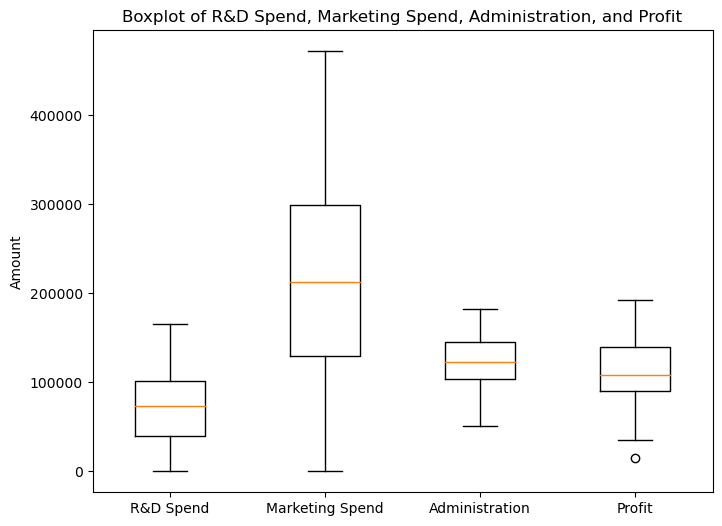

In [8]:
## Box Plot for outliners
# Creating a boxplot
plt.figure(figsize=(8,6))
plt.boxplot([dataset['R&D Spend'], dataset['Marketing Spend'], dataset['Administration'], dataset['Profit']],
            labels=['R&D Spend', 'Marketing Spend', 'Administration', 'Profit'])

# Adding labels and title
plt.ylabel('Amount')
plt.title('Boxplot of R&D Spend, Marketing Spend, Administration, and Profit')

# Show the plot
plt.show()

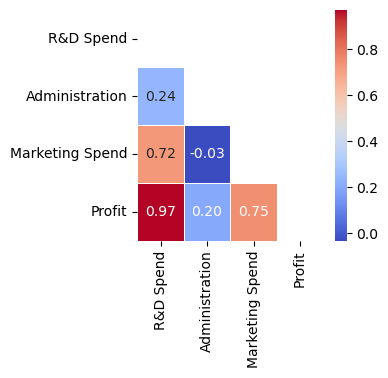

In [9]:
# Assuming dataset is a Pandas DataFrame
Ndata = dataset.iloc[:, [0,1,2,4]]  # Using iloc to select specific columns

# Compute the correlation matrix
correlation_matrix = Ndata.corr()

# Plot the heatmap
plt.figure(figsize=(3,3))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask for upper triangle
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, mask=mask)

# Display the plot
plt.show()



## Encoding categorical data

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Reviewing model parameter

In [14]:
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficient: {regressor.coef_}")

Intercept: 42467.52924854249
Coefficient: [ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]


## Predicting the Test set results

In [15]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [16]:
# evaluate the model

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 83502864.03259295
R-squared: 0.9347068473282303
